**1. Устранение пропусков в данных**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
# Будем использовать только обучающую выборку
hdata_loaded = pd.read_csv('hockey_players_stats.csv', sep=",")

In [ ]:
hdata_loaded.shape

(2806, 22)

In [ ]:
hdata = hdata_loaded

In [ ]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('No.', dtype('int64')),
 ('Name', dtype('O')),
 ('Position', dtype('O')),
 ('G', dtype('float64')),
 ('A', dtype('float64')),
 ('P', dtype('float64')),
 ('PIM', dtype('float64')),
 ('TS', dtype('float64')),
 ('+/-', dtype('float64')),
 ('TOT', dtype('O')),
 ('SHF', dtype('float64')),
 ('AVG', dtype('O')),
 ('Sh_Period_1', dtype('float64')),
 ('Time_On_Ice_Period_1', dtype('O')),
 ('Sh_Period_2', dtype('float64')),
 ('Time_On_Ice_Period_2', dtype('O')),
 ('Sh_Period_3', dtype('float64')),
 ('Time_On_Ice_Period_3', dtype('O')),
 ('url_game', dtype('O')),
 ('team', dtype('O')),
 ('Sh_OverTime', dtype('float64')),
 ('Time_On_Ice_OverTime', dtype('O'))]

In [ ]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['G',
 'A',
 'P',
 'PIM',
 'TS',
 '+/-',
 'TOT',
 'SHF',
 'AVG',
 'Sh_Period_1',
 'Time_On_Ice_Period_1',
 'Sh_Period_2',
 'Time_On_Ice_Period_2',
 'Sh_Period_3',
 'Time_On_Ice_Period_3',
 'Sh_OverTime',
 'Time_On_Ice_OverTime']

In [ ]:
hdata.shape

(2806, 22)

In [ ]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('G', 279),
 ('A', 279),
 ('P', 279),
 ('PIM', 279),
 ('TS', 279),
 ('+/-', 513),
 ('TOT', 279),
 ('SHF', 513),
 ('AVG', 279),
 ('Sh_Period_1', 279),
 ('Time_On_Ice_Period_1', 513),
 ('Sh_Period_2', 279),
 ('Time_On_Ice_Period_2', 513),
 ('Sh_Period_3', 279),
 ('Time_On_Ice_Period_3', 513),
 ('Sh_OverTime', 2498),
 ('Time_On_Ice_OverTime', 2526)]

In [ ]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('G', 0.09942979330007128),
 ('A', 0.09942979330007128),
 ('P', 0.09942979330007128),
 ('PIM', 0.09942979330007128),
 ('TS', 0.09942979330007128),
 ('+/-', 0.18282252316464717),
 ('TOT', 0.09942979330007128),
 ('SHF', 0.18282252316464717),
 ('AVG', 0.09942979330007128),
 ('Sh_Period_1', 0.09942979330007128),
 ('Time_On_Ice_Period_1', 0.18282252316464717),
 ('Sh_Period_2', 0.09942979330007128),
 ('Time_On_Ice_Period_2', 0.18282252316464717),
 ('Sh_Period_3', 0.09942979330007128),
 ('Time_On_Ice_Period_3', 0.18282252316464717),
 ('Sh_OverTime', 0.8902352102637205),
 ('Time_On_Ice_OverTime', 0.9002138275124733)]

In [ ]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['SHF','Sh_Period_1','Sh_Period_2','Sh_Period_3']

Удаление может производиться для группы строк или колонок.

In [ ]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(2293, 4)

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

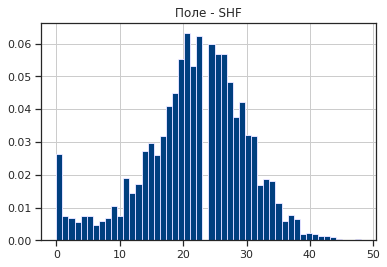

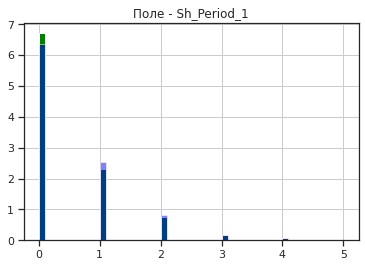

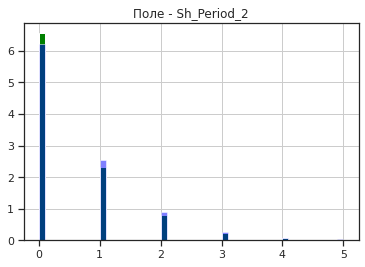

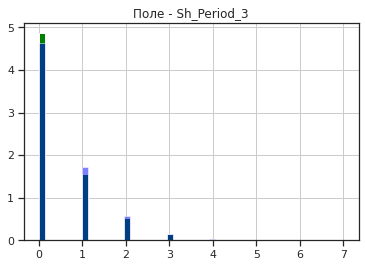

In [ ]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

Заполнение значений для одного признака
В этом случае данные которые находятся в соседних признаках (колонках) не учитываются при заполнении.

Заполнение (внедрение) значений или импьютация (imputation) - это заполнение пропущенных значений их статистическими оценками.

Для числовых признаков:

Заполнение показателями центра распределения.
Заполнение константой. Полезно в случае "неслучайного" распределения пропусков.
Заполнение "хвостом распределения".
Для категориальных признаков:

Заполнение наиболее распространенным значением категории (аналогом моды).
Введение отдельного значения категории для пропущенных значений.
Для числовых и категориальных признаков:

Добавления флага пропусков.
Заполнение случайным значением признака. Метод обычно применяют на больших выборках. Преимуществом является то, что он сохраняет дисперсию исходной выборки.
Заполнение показателями центра распределения и константой
Для числовых признаков.

В случае нормального распределения математическое ожидание, медиана и мода совпадают:

In [ ]:
# Пример работы MissingIndicator
temp_x1 = np.array([[np.nan, 1, 3], [4, 0, np.nan], [8, 1, 0]])
print('Исходный массив:')
print(temp_x1)
indicator = MissingIndicator()
temp_x1_transformed = indicator.fit_transform(temp_x1)
print('Маска пропущенных значений:')
print(temp_x1_transformed)

Исходный массив:
[[nan  1.  3.]
 [ 4.  0. nan]
 [ 8.  1.  0.]]
Маска пропущенных значений:
[[ True False]
 [False  True]
 [False False]]


In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [ ]:
all_data, filled_data, missed_data = impute_column(hdata, 'SHF', 'mean')
all_data

array([21.7134758, 21.7134758, 28.       , ..., 21.7134758, 21.7134758,
       21.7134758])

In [ ]:
filled_data

array([21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134758,
       21.7134758, 21.7134758, 21.7134758, 21.7134758, 21.7134

In [ ]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

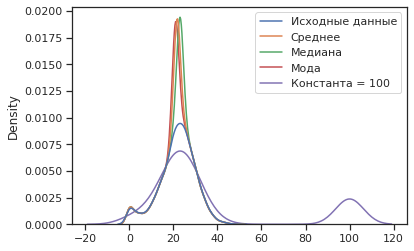

In [ ]:
research_impute_numeric_column(hdata, 'SHF', 100)

Заполнение наиболее распространенным значением категории

In [ ]:
# Похоже на нормальное
SHF_ev = hdata['SHF'].mean() + 3*hdata['SHF'].std()
SHF_ev

46.50781998276504

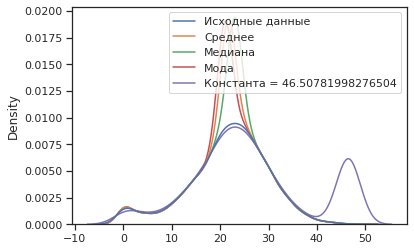

In [ ]:
research_impute_numeric_column(hdata, 'SHF', SHF_ev)

In [ ]:
# Ассиметричное
IQR = hdata['SHF'].quantile(0.75) - hdata['SHF'].quantile(0.25)
SHF_ev1 = hdata['SHF'].quantile(0.75) + 3*IQR
print('IQR={}, extreme_value={}'.format(IQR, SHF_ev1))

IQR=10.0, extreme_value=57.0


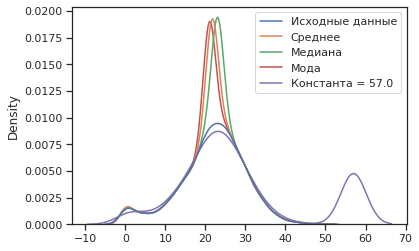

In [ ]:
research_impute_numeric_column(hdata, 'SHF', SHF_ev1)

In [ ]:
SHF_ev2 = hdata['SHF'].quantile(0.75) + 1.5*IQR
print('IQR={}, extreme_value={}'.format(IQR, SHF_ev2))

IQR=10.0, extreme_value=42.0


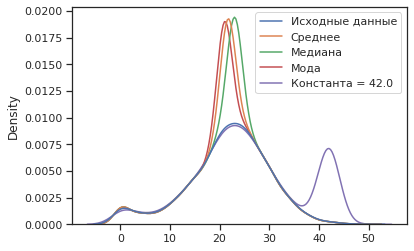

In [ ]:
research_impute_numeric_column(hdata, 'SHF', SHF_ev2)

Заполнение наиболее распространенным значением категории

In [ ]:
hdata_cols = ['SHF']
hdata_new = hdata[hdata_cols].copy()

In [ ]:
SHF_new_temp, _, _ = impute_column(hdata_new, 'SHF', 'most_frequent')

In [ ]:
hdata_new['SHF'] = SHF_new_temp

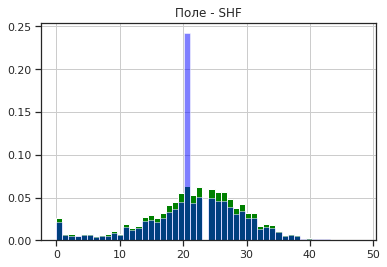

In [ ]:
plot_hist_diff(hdata, hdata_new, hdata_cols)

Добавления флага пропусков

In [ ]:
hdata_mis = hdata[['SHF']].copy()
hdata_mis.head()

,SHF
0,NaN
1,NaN
2,28.0
3,32.0
4,22.0


In [ ]:
indicator = MissingIndicator()
SHF_missing = indicator.fit_transform(hdata_mis[['SHF']])
SHF_missing

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
SHF_missing_int = [1 if i==True else 0 for i in SHF_missing]
SHF_missing_int[:10]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
hdata_mis['SHF_missing'] = SHF_missing_int
hdata_mis.head()

,SHF,SHF_missing
0,NaN,1
1,NaN,1
2,28.0,0
3,32.0,0
4,22.0,0


Импьютация с использованием метода ближайших соседей

In [ ]:
knnimpute_cols = ['SHF']

In [ ]:
knnimpute_hdata = hdata[knnimpute_cols].copy()
knnimpute_hdata.head()

,SHF
0,NaN
1,NaN
2,28.0
3,32.0
4,22.0


In [ ]:
# Признаки с пропусками
knnimpute_hdata.isnull().sum()

SHF    513
dtype: int64

In [ ]:
knnimputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(knnimpute_hdata)
knnimpute_hdata_imputed = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=knnimpute_hdata.columns)
knnimpute_hdata_imputed.head()

,SHF
0,21.713476
1,21.713476
2,28.000000
3,32.000000
4,22.000000


In [ ]:
# Пропуски заполнены
knnimpute_hdata_imputed.isnull().sum()

SHF    0
dtype: int64

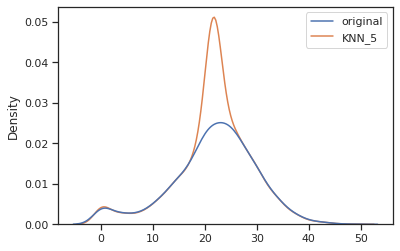

In [ ]:
SHF_df = pd.DataFrame({'original': knnimpute_hdata['SHF'].values})
SHF_df['KNN_5'] = knnimpute_hdata_imputed['SHF']
sns.kdeplot(data=SHF_df)

**2. Кодирование категориальных признаков**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Загрузка и предобработка данных

In [ ]:
# Будем использовать только обучающую выборку
data_loaded = pd.read_csv('athletes.csv', sep=",")

In [ ]:
# размер набора данных
data_loaded.shape

(2897, 14)

In [ ]:
data_loaded.head()

,name,short_name,gender,birth_date,birth_place,birth_country,country,country_code,discipline,discipline_code,residence_place,residence_country,height_m/ft,url
0,AAGAARD Mikkel,AAGAARD M,Male,1995-10-18,FREDERIKSHAVN,Denmark,Denmark,DEN,Ice Hockey,IHO,ORNSKOLDSVIK,Sweden,1.84/6'0'',../../../en/results/ice-hockey/athlete-profile...
1,AALTO Antti,AALTO A,Male,1995-04-02,KITEE,Finland,Finland,FIN,Ski Jumping,SJP,KUOPIO,Finland,NaN,../../../en/results/ski-jumping/athlete-profil...
2,AALTONEN Miro,AALTONEN M,Male,1993-06-07,JOENSUU,Finland,Finland,FIN,Ice Hockey,IHO,PODOLSK,Russian Federation,1.80/5'10'',../../../en/results/ice-hockey/athlete-profile...
3,ABDELKADER Justin,ABDELKADER J,Male,1987-02-25,"MUSKEGON, MI",United States of America,United States of America,USA,Ice Hockey,IHO,"GRAND RAPIDS, MI",United States of America,1.87/6'1'',../../../en/results/ice-hockey/athlete-profile...
4,ABDI Fayik,ABDI F,Male,1997-10-07,"SAN DIEGO, CA",United States of America,Saudi Arabia,KSA,Alpine Skiing,ALP,DHAHRAN,Saudi Arabia,NaN,../../../en/results/alpine-skiing/athlete-prof...


In [ ]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('name', ('object', 0)),
 ('short_name', ('object', 0)),
 ('gender', ('object', 0)),
 ('birth_date', ('object', 12)),
 ('birth_place', ('object', 248)),
 ('birth_country', ('object', 131)),
 ('country', ('object', 0)),
 ('country_code', ('object', 0)),
 ('discipline', ('object', 12)),
 ('discipline_code', ('object', 0)),
 ('residence_place', ('object', 406)),
 ('residence_country', ('object', 266)),
 ('height_m/ft', ('object', 2152)),
 ('url', ('object', 0))]

In [ ]:
# Используем только некоторые признаки
cols_filter = ['name', 'short_name', 'gender','country','country_code',
        'discipline_code','url']
data = data_loaded[cols_filter]
data.head()

,name,short_name,gender,country,country_code,discipline_code,url
0,AAGAARD Mikkel,AAGAARD M,Male,Denmark,DEN,IHO,../../../en/results/ice-hockey/athlete-profile...
1,AALTO Antti,AALTO A,Male,Finland,FIN,SJP,../../../en/results/ski-jumping/athlete-profil...
2,AALTONEN Miro,AALTONEN M,Male,Finland,FIN,IHO,../../../en/results/ice-hockey/athlete-profile...
3,ABDELKADER Justin,ABDELKADER J,Male,United States of America,USA,IHO,../../../en/results/ice-hockey/athlete-profile...
4,ABDI Fayik,ABDI F,Male,Saudi Arabia,KSA,ALP,../../../en/results/alpine-skiing/athlete-prof...


In [ ]:
# Убедимся что нет пустых значений
data.isnull().sum()

name               0
short_name         0
gender             0
country            0
country_code       0
discipline_code    0
url                0
dtype: int64

1）. Кодирование категорий целочисленными значениями - label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['name'])

In [ ]:
data['name'].unique()

array(['AAGAARD Mikkel', 'AALTO Antti', 'AALTONEN Miro', ...,
       'ZUZIN Peter', 'ZVEJNIEKS Miks', 'ZYLA Piotr'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 2891, 2892, 2893])

In [ ]:
le.inverse_transform([0, 1, 2, 3])

array(['AAGAARD Mikkel', 'AALTO Antti', 'AALTONEN Miro',
       'ABDELKADER Justin'], dtype=object)

2). Кодирование категорий наборами бинарных значений - one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['name']])
cat_enc_ohe

<2897x2894 sparse matrix of type '<class 'numpy.float64'>'
	with 2897 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.get_dummies(data[['name']]).head()

,name_AAGAARD Mikkel,name_AALTO Antti,name_AALTONEN Miro,name_ABDELKADER Justin,name_ABDI Fayik,name_ABDUL-SABOOR Hakeem,name_ABEDA Shannon,name_ABELTSHAUSER Konrad,name_ABOLS Rodrigo,name_ABRAMENKO Oleksandr,...,name_le BLE JAQUES Leo,name_van 'T WOUT Jens,name_van KERKHOF Yara,name_van POTTELBERGHE Joren,name_van ZUNDERT Lindsay,name_van den BROECKE Dries,name_van der GRAAFF Laurien,name_van der POEL Nils,name_van der VELDEN Niek,name_von APPEN Henrik
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Добавление отдельной колонки, признака пустых значений
pd.get_dummies(data[['name']], dummy_na=True).head()

,name_AAGAARD Mikkel,name_AALTO Antti,name_AALTONEN Miro,name_ABDELKADER Justin,name_ABDI Fayik,name_ABDUL-SABOOR Hakeem,name_ABEDA Shannon,name_ABELTSHAUSER Konrad,name_ABOLS Rodrigo,name_ABRAMENKO Oleksandr,...,name_van 'T WOUT Jens,name_van KERKHOF Yara,name_van POTTELBERGHE Joren,name_van ZUNDERT Lindsay,name_van den BROECKE Dries,name_van der GRAAFF Laurien,name_van der POEL Nils,name_van der VELDEN Niek,name_von APPEN Henrik,name_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders.one_hot import OneHotEncoder as ce_OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ce_OneHotEncoder1 = ce_OneHotEncoder()
data_OHE = ce_OneHotEncoder1.fit_transform(data[data.columns.difference(['country'])])

In [ ]:
data_OHE

,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,country_code_8,country_code_9,country_code_10,...,url_2888,url_2889,url_2890,url_2891,url_2892,url_2893,url_2894,url_2895,url_2896,url_2897
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2895,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


3). Count (frequency) encoding

In [ ]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [ ]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data[data.columns.difference(['country'])])

In [ ]:
data_COUNT_ENC

,country_code,discipline_code,gender,name,short_name,url
0,63,547,1595,1,1,1
1,96,110,1595,1,1,1
2,96,547,1595,1,1,1
3,225,547,1595,1,1,1
4,1,310,1595,1,1,1
...,...,...,...,...,...,...
2892,57,164,1595,1,1,1
2893,28,164,1290,1,1,1
2894,50,547,1595,1,1,1
2895,61,310,1595,1,1,1


In [ ]:
data['country'].unique()

array(['Denmark', 'Finland', 'United States of America', 'Saudi Arabia',
       'Eritrea', 'Germany', 'Latvia', 'Ukraine', 'Netherlands',
       "People's Republic of China", 'France', 'Sweden', 'Switzerland',
       'Belgium', 'Islamic Republic of Iran', 'Kazakhstan', 'Estonia',
       'ROC', 'Turkey', 'Monaco', 'Jamaica', 'Bosnia and Herzegovina',
       'Belarus', 'Canada', 'Italy', 'Norway', 'Japan', 'Greece',
       'Bulgaria', 'Australia', 'Morocco', 'Chile', 'Ireland', 'Mongolia',
       'LBN', 'Croatia', 'Great Britain', 'Republic of Korea', 'Austria',
       'Slovakia', 'Lithuania', 'New Zealand', 'Spain', 'Czech Republic',
       'Argentina', 'Georgia', 'Poland', 'Brazil', 'Slovenia', 'Portugal',
       'Bolivia', 'Trinidad and Tobago', 'Israel', 'Romania', 'Mexico',
       'Thailand', 'Hungary', 'Hong Kong, China', 'Madagascar',
       'American Samoa', 'North Macedonia', 'Puerto Rico',
       'Republic of Moldova', 'Iceland', 'Ecuador', 'Andorra', 'Armenia',
       'San Mar

In [ ]:
data_COUNT_ENC['country_code'].unique()

array([ 63,  96, 225,   1, 148,  61,  46,  41, 182,  86, 118, 169,  19,
         3,  34,  26, 217,   7,   6,  28, 215, 119,  84, 121,   5,  16,
        44,   4,   2,  11,  49,  65, 105,  50,  13,  15,  14, 115,   9,
        57,  10,  21])

In [ ]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data[data.columns.difference(['name'])])

In [ ]:
data_FREQ_ENC

,country,country_code,discipline_code,gender,short_name,url
0,0.021747,0.021747,0.188816,0.550570,0.000345,0.000345
1,0.033138,0.033138,0.037970,0.550570,0.000345,0.000345
2,0.033138,0.033138,0.188816,0.550570,0.000345,0.000345
3,0.077667,0.077667,0.188816,0.550570,0.000345,0.000345
4,0.000345,0.000345,0.107007,0.550570,0.000345,0.000345
...,...,...,...,...,...,...
2892,0.019676,0.019676,0.056610,0.550570,0.000345,0.000345
2893,0.009665,0.009665,0.056610,0.445288,0.000345,0.000345
2894,0.017259,0.017259,0.188816,0.550570,0.000345,0.000345
2895,0.021056,0.021056,0.107007,0.550570,0.000345,0.000345


In [ ]:
data_FREQ_ENC['short_name'].unique()

array([0.00034518, 0.00069037, 0.00172592, 0.00103555])

6). Helmert encoding

In [ ]:
from category_encoders.helmert import HelmertEncoder as ce_HelmertEncoder

In [ ]:
ce_HelmertEncoder1 = ce_HelmertEncoder()
data_HELM_ENC = ce_HelmertEncoder1.fit_transform(data[data.columns.difference(['name'])], data['name'])

In [ ]:
data_HELM_ENC

,intercept,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,...,url_2886,url_2887,url_2888,url_2889,url_2890,url_2891,url_2892,url_2893,url_2894,url_2895
0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2892.0,-1.0,-1.0,-1.0,-1.0
2893,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2893.0,-1.0,-1.0,-1.0
2894,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2894.0,-1.0,-1.0
2895,1,0.0,0.0,0.0,0.0,0.0,6.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2895.0,-1.0


**3. Нормализация числовых признаков**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
# Будем использовать только обучающую выборку
data = pd.read_csv('china_population.csv', sep=",")

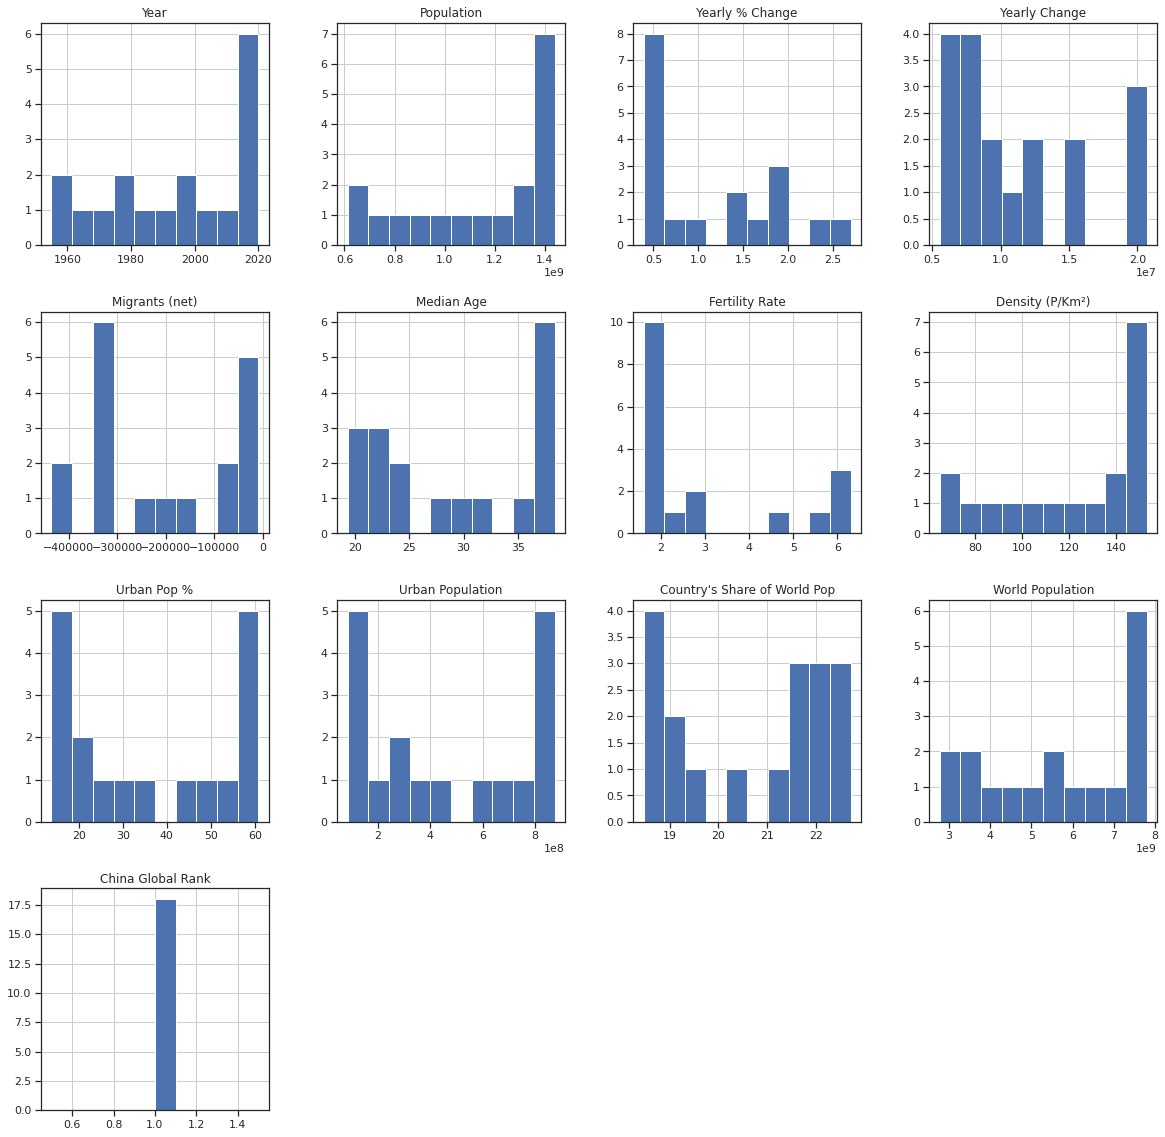

In [ ]:
data.hist(figsize=(20,20))
plt.show()

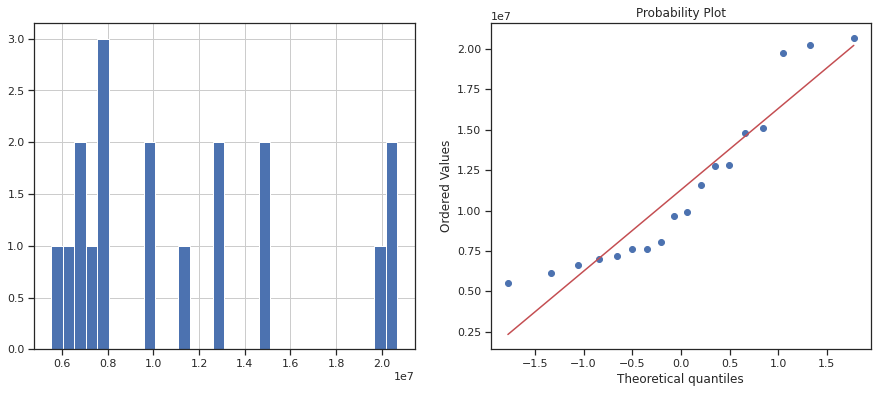

In [ ]:
diagnostic_plots(data, 'Yearly Change')

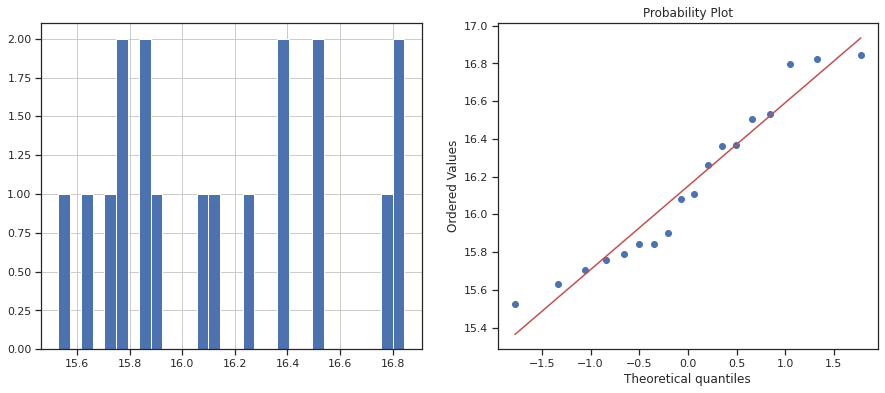

In [ ]:
data['Yearly Change_log'] = np.log(data['Yearly Change'])
diagnostic_plots(data, 'Yearly Change_log')

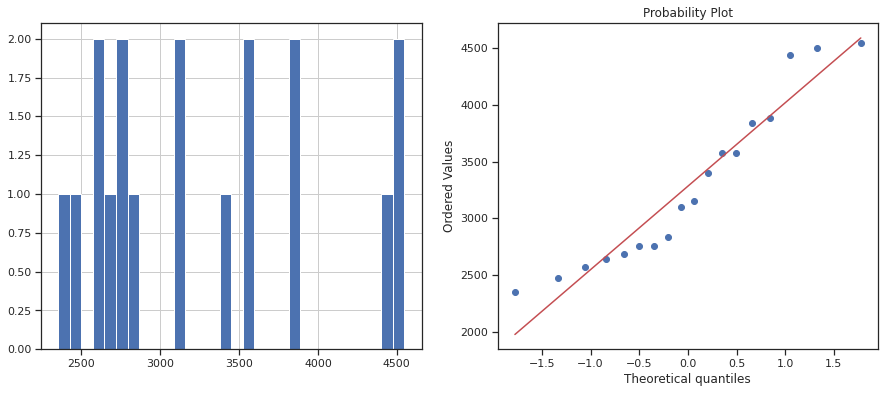

In [ ]:
data['Yearly Change_sqr'] = data['Yearly Change']**(1/2) 
diagnostic_plots(data, 'Yearly Change_sqr')

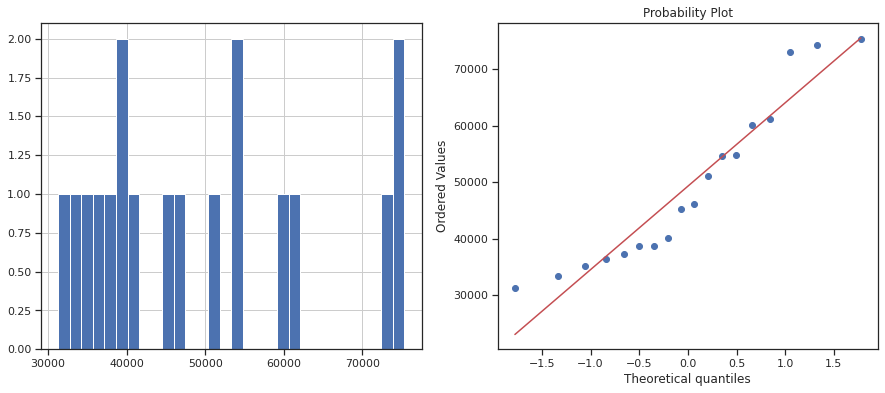

In [ ]:
data['Yearly Change_exp1'] = data['Yearly Change']**(1/1.5)
diagnostic_plots(data, 'Yearly Change_exp1')

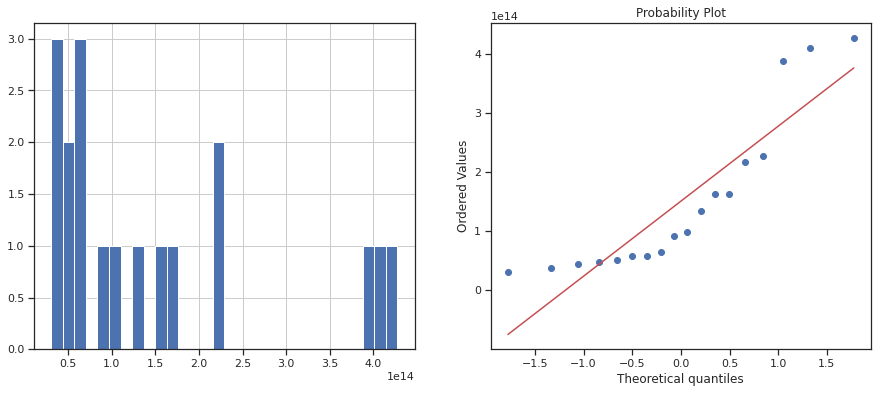

In [ ]:
data['Yearly Change_exp2'] = data['Yearly Change']**(2)
diagnostic_plots(data, 'Yearly Change_exp2')

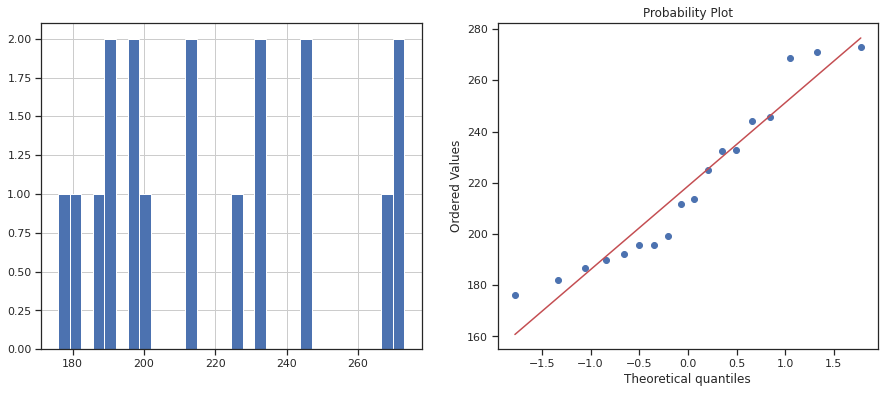

In [ ]:
data['Yearly Change_exp3'] = data['Yearly Change']**(0.333)
diagnostic_plots(data, 'Yearly Change_exp3')

Оптимальное значение λ = -0.47912317902266444


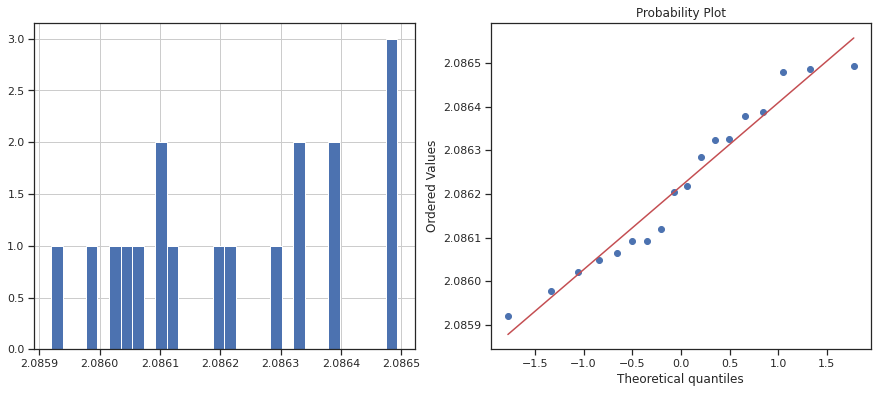

In [ ]:
data['Yearly Change_boxcox'], param = stats.boxcox(data['Yearly Change']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Yearly Change_boxcox')